# 0. Introduction

**Dataset**  
* [diabetes(당뇨병)](https://github.com/MyungKyuYi/AI-class/blob/main/diabetes.csv)

**Environment**
* macOS `x86`cpu

**Framework**  
* TensorFlow: Version `2.10.0`

**Dependencies**  
* Python: Version `3.9.19`
* Numpy: Version `1.24.3`
* Pandas: Version `2.2.2`
* Matplotlib: Version `3.9.2`
* scikit-learn: Version `1.2.2`

**Purpose**
* 당뇨병 데이터를 가지고 Machine Learning 5가지 Classification을 수행
  * SVM, LR, RF, DT, KNN
* 동일한 데이터로 Deep Learning Classification을 수행
  * Dense Layer만 사용하여 진행할 것
* 동일한 데이터에서 'Outcome'을 삭제하고, 'BMI'를 Label로 하여 Regression을 수행

# 1. Load dataset & ML

In [1]:
# import default libraries for ML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# load and represent the dataset
df = pd.read_csv("./datasets/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# features description
'''
| Pregnancies               | 임신 횟수
| Glucose                   | 글루코스
| BloodPressure             | 혈압
| SkinThickness             | 삼두근 부위 피부 두께
| Insulin                   | 인슐린 수치
| BMI                       | BMI 수치
| DiabetesPedigreeFunction  | 당뇨 유전병 인자 함수
| Age                       | 나이
'''

'\n| Pregnancies               | 임신 횟수\n| Glucose                   | 글루코스\n| BloodPressure             | 혈압\n| SkinThickness             | 삼두근 부위 피부 두께\n| Insulin                   | 인슐린 수치\n| BMI                       | BMI 수치\n| DiabetesPedigreeFunction  | 당뇨 유전병 인자 함수\n| Age                       | 나이\n'

In [4]:
print(f"columns: \n{df.columns}")
print()
print(f"shape: \n{df.shape}")

columns: 
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

shape: 
(768, 9)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
pd.unique(df['Outcome'])

array([1, 0])

In [8]:
# Check the label count(1) - by numeric table
pd.value_counts(df['Outcome'])

/var/folders/m_/5z28qmvj575cs_9xldf0gyd80000gn/T/ipykernel_44641/161356557.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['Outcome'])


Outcome
0    500
1    268
Name: count, dtype: int64

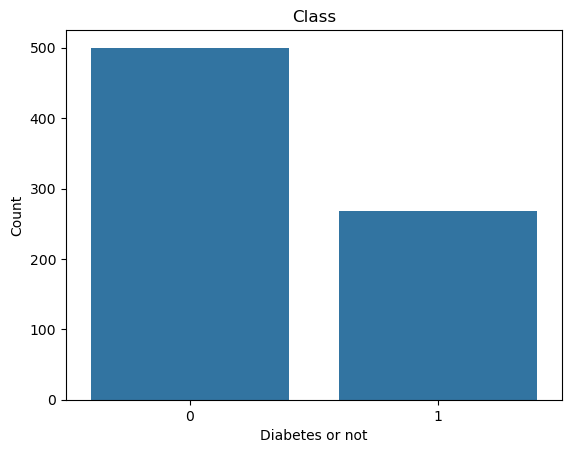

In [9]:
# Check the label count(2) - by graph
sns.countplot(data=df, x='Outcome')
plt.xlabel("Diabetes or not")
plt.ylabel("Count")
plt.title("Class")
plt.show()

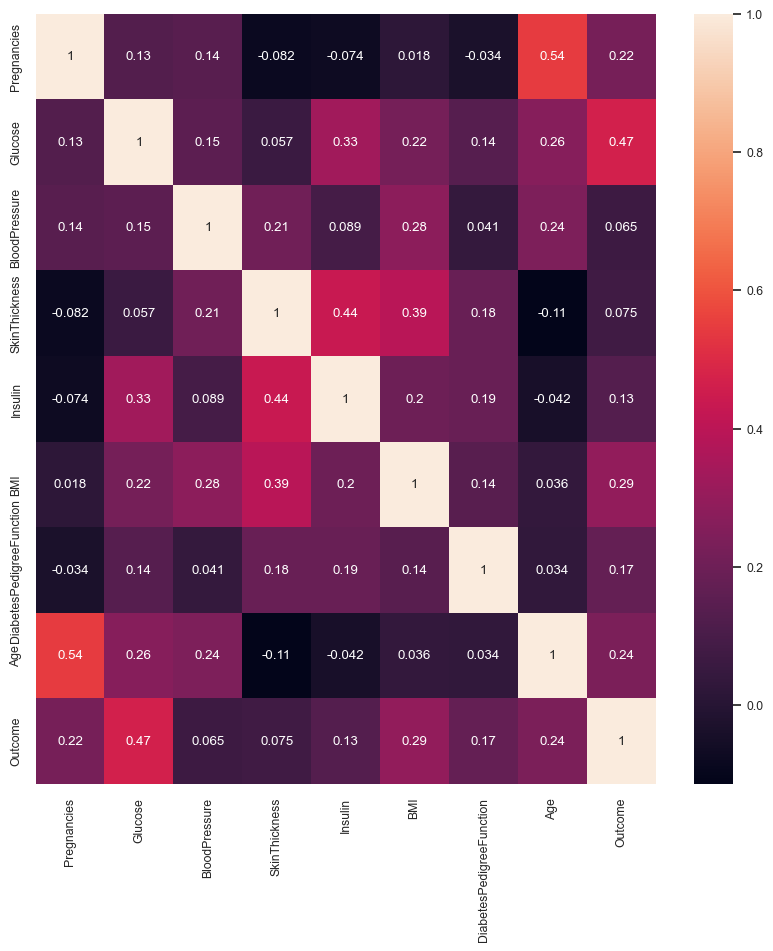

In [10]:
# Check the correlations(1) by heatmap
# If corr >= 0.3, positive-correlated and if corr >= 0.7, high correlated
# If corr <= -0.3, negative-correlated and if corr <= -0.7, high correlated
df_corr = df.corr()

plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(data=df_corr, annot=True)
plt.show()

# 'Glucose' is positive-correlated with 'Outcome'

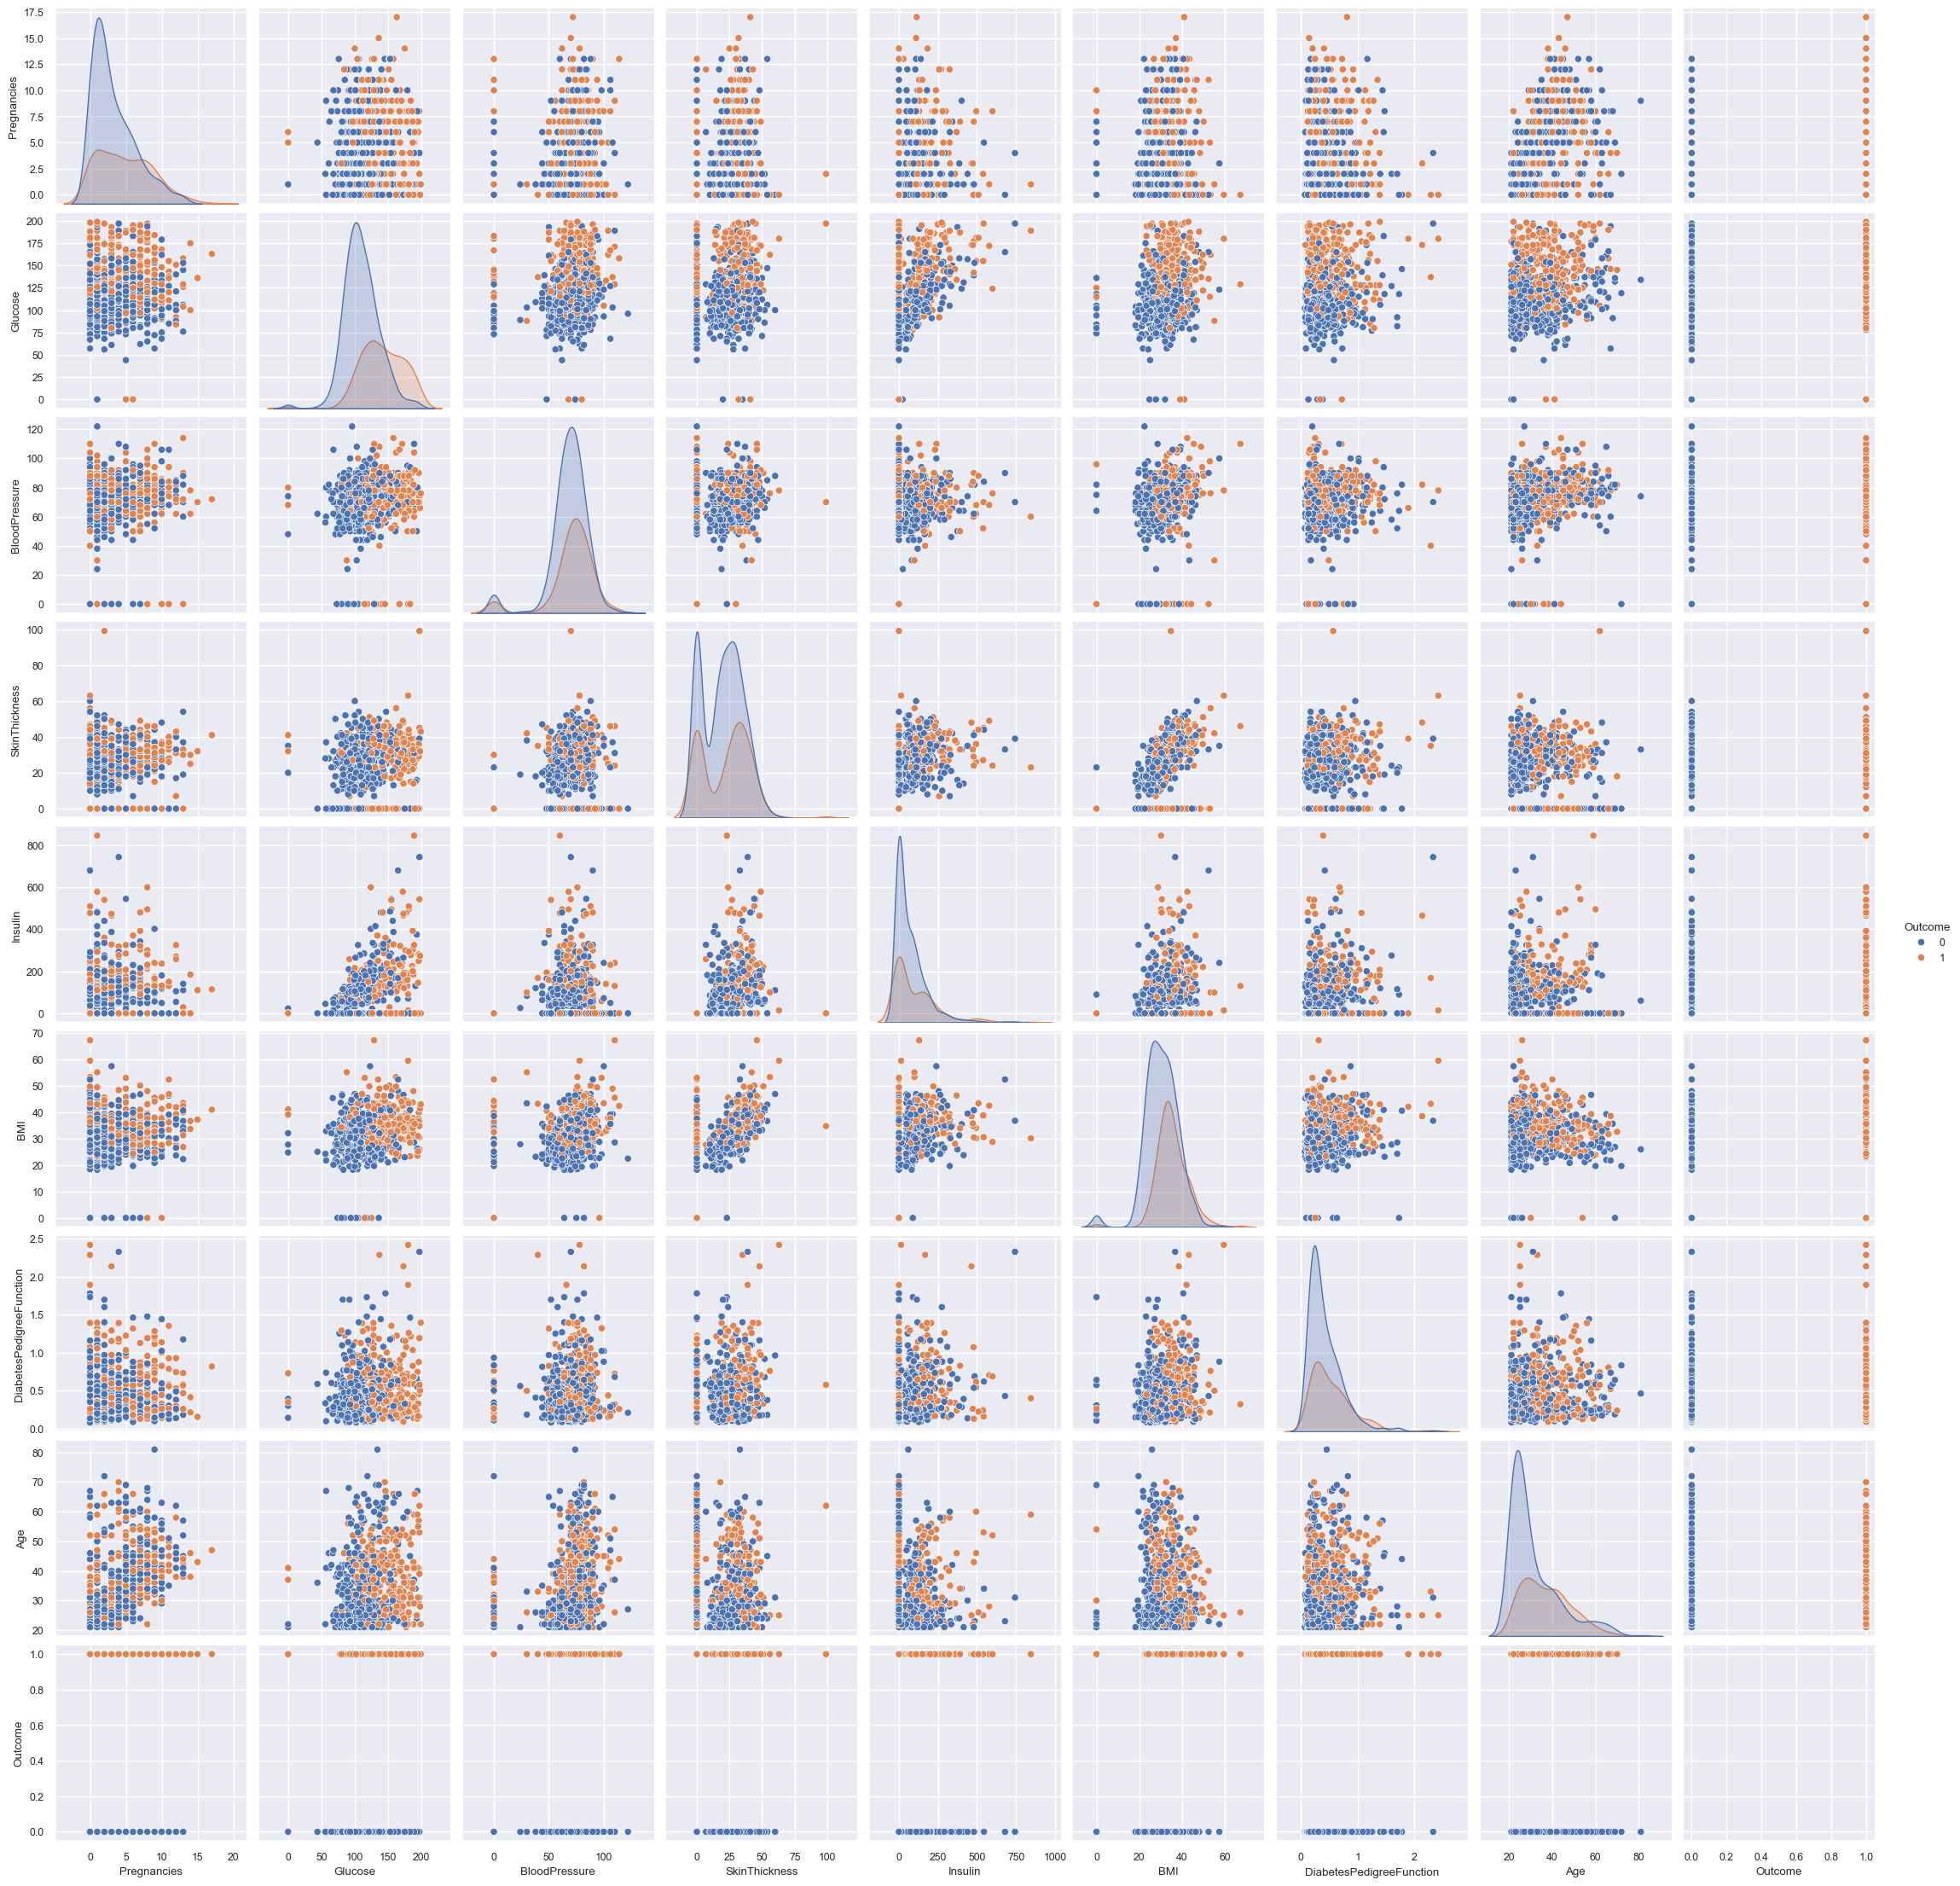

In [11]:
# Check the correlations(2) by pairplot
sns.pairplot(data=df,
             vars=df.columns,
             hue='Outcome')
plt.show()

In [12]:
# split dataset into features and label
# convert to numpy ndarray
X = df.drop(['Outcome'], axis=1).to_numpy()
y = df['Outcome'].to_numpy()
print(X[:5])
print("\n\n")
print(y[:5])

[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]]



[1 0 1 0 1]


In [13]:
# split X and y into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    shuffle=True,
                                                    random_state=42)
print(f"X_train: Shape {X_train.shape} \nX_test: Shape {X_test.shape}")

X_train: Shape (614, 8) 
X_test: Shape (154, 8)


In [14]:
# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train[:3])
print(X_train_scaled[:3])
# print(X_test_scaled[:3])

[[  1.     90.     62.     12.     43.     27.2     0.58   24.   ]
 [  5.    126.     78.     27.     22.     29.6     0.439  40.   ]
 [  2.    105.     58.     40.     94.     34.9     0.225  25.   ]]
[[-0.85135507 -0.98013068 -0.40478372 -0.55397256 -0.33131928 -0.60767846
   0.31079384 -0.79216928]
 [ 0.35657564  0.16144422  0.46536842  0.392787   -0.52639809 -0.30213902
  -0.11643851  0.56103382]
 [-0.5493724  -0.50447447 -0.62232176  1.21331196  0.14244354  0.3725939
  -0.76486207 -0.70759409]]


## 1.1. K-NN Classification

In [15]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(X_train_scaled, y_train)
kn.score(X_train_scaled, y_train)

0.8061889250814332

In [16]:
# Accuracy of the predicted values

from sklearn.metrics import classification_report, confusion_matrix

y_pred = kn.predict(X_test_scaled)
y_test_class = y_test
y_pred_class = y_pred

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.75      0.80      0.78       100
           1       0.58      0.52      0.55        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154

[[80 20]
 [26 28]]


## 1.2. Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr.score(X_train_scaled, y_train)

0.7915309446254072

In [18]:
# Accuracy of the predicted values
y_pred = lr.predict(X_test_scaled)
y_test_class = y_test
y_pred_class = y_pred

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154

[[82 18]
 [26 28]]


## 1.3. Decision Tree
DT의 경우에는 features에 대해서 scale standardization을 하지 않아도 된다.  
또한 오히려 하지 않는 편이 인간이 model을 파악하기에 유용하다.

In [19]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)   # non-scaled X로 fitting
dt.score(X_train, y_train) # print 1.0

# overfitting

1.0

In [20]:
# overfitting 해소
dt.max_depth = 5 # max_depth 조정
dt.fit(X_train, y_train)
dt.score(X_train, y_train) # prints 0.824104...

0.8241042345276873

In [21]:
# Accuracy of the predicted values
y_pred = dt.predict(X_test)
y_test_class = y_test
y_pred_class = y_pred

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       100
           1       0.70      0.70      0.70        54

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154

[[84 16]
 [16 38]]


## 1.4. Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=5, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
rf.score(X_train, y_train) # prints 0.85504...

0.8550488599348535

In [23]:
# Accuracy of the predicted values
y_pred = rf.predict(X_test)
y_test_class = y_test
y_pred_class = y_pred

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       100
           1       0.64      0.50      0.56        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.68       154
weighted avg       0.72      0.73      0.72       154

[[85 15]
 [27 27]]


## 1.5. Support Vector Machine

In [24]:
from sklearn.svm import SVC # Support Vector Classification

svm = SVC(kernel = 'linear', C=1.0, random_state=42)
svm.fit(X_train_scaled, y_train)
svm.score(X_train_scaled, y_train)

0.7915309446254072

In [25]:
# Accuracy of the predicted values
y_pred = rf.predict(X_test)
y_test_class = y_test
y_pred_class = y_pred

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       100
           1       0.64      0.50      0.56        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.68       154
weighted avg       0.72      0.73      0.72       154

[[85 15]
 [27 27]]


# 2. DL_dense layer only

In [26]:
import tensorflow as tf
from tensorflow import keras

2024-09-11 15:41:48.769655: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
# Define the one-hot encoding function
def one_hot_encoding(label_array):
    label_list = []
    for i in range(len(label_array)):
        label_list.append([0] * len(np.unique(label_array)))

    label_array_onehot = np.array(label_list)
    for j in range(len(label_list)):
        hot_idx = label_array[j]
        label_array_onehot[j][hot_idx] = 1

    return label_array_onehot

In [28]:
y_train_onehot = one_hot_encoding(y_train)
y_test_onehot = one_hot_encoding(y_test)

print(type(y_train_onehot))
print(y_train_onehot[:3])

<class 'numpy.ndarray'>
[[1 0]
 [1 0]
 [1 0]]


In [29]:
# Create the model
model = keras.models.Sequential()

# Add layers
relu = keras.activations.relu
sigmoid = keras.activations.sigmoid
model.add(keras.layers.Dense(units=32,
                             activation=relu,
                             name='Dense1',
                             input_shape=(8,)))
model.add(keras.layers.Dense(units=2,
                             activation=sigmoid,
                             name='Output'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense1 (Dense)              (None, 32)                288       
                                                                 
 Output (Dense)              (None, 2)                 66        
                                                                 
Total params: 354
Trainable params: 354
Non-trainable params: 0
_________________________________________________________________


2024-09-11 15:41:53.816942: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [30]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(X_train_scaled, y_train_onehot,
                    validation_split=0.2,
                    batch_size=None,
                    verbose=2,
                    epochs=20,
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
16/16 - 1s - loss: 0.7299 - accuracy: 0.6069 - val_loss: 0.6942 - val_accuracy: 0.6911 - 749ms/epoch - 47ms/step
Epoch 2/20
16/16 - 0s - loss: 0.6770 - accuracy: 0.6741 - val_loss: 0.6427 - val_accuracy: 0.7236 - 67ms/epoch - 4ms/step
Epoch 3/20
16/16 - 0s - loss: 0.6343 - accuracy: 0.7373 - val_loss: 0.6000 - val_accuracy: 0.7236 - 70ms/epoch - 4ms/step
Epoch 4/20
16/16 - 0s - loss: 0.6010 - accuracy: 0.7475 - val_loss: 0.5657 - val_accuracy: 0.7480 - 70ms/epoch - 4ms/step
Epoch 5/20
16/16 - 0s - loss: 0.5741 - accuracy: 0.7617 - val_loss: 0.5417 - val_accuracy: 0.7724 - 70ms/epoch - 4ms/step
Epoch 6/20
16/16 - 0s - loss: 0.5534 - accuracy: 0.7536 - val_loss: 0.5211 - val_accuracy: 0.7724 - 67ms/epoch - 4ms/step
Epoch 7/20
16/16 - 0s - loss: 0.5360 - accuracy: 0.7556 - val_loss: 0.5049 - val_accuracy: 0.7805 - 66ms/epoch - 4ms/step
Epoch 8/20
16/16 - 0s - loss: 0.5233 - accuracy: 0.7576 - val_loss: 0.4930 - val_accuracy: 0.7805 - 67ms/epoch - 4ms/step
Epoch 9/20
16/16 - 0s 

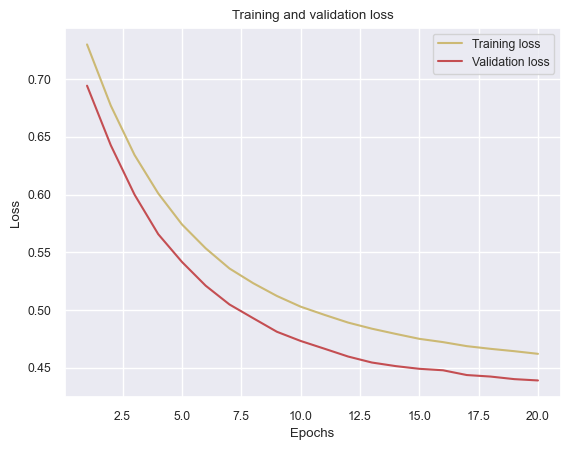

In [31]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [32]:
# 더 자세한 결과 확인
# model.compile()에서 'metrics'를 이용해서도 확인 가능할 것 같지만,
# 일단 배운대로만 진행함

from sklearn.metrics import classification_report, confusion_matrix

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

y_pred = model(X_test_scaled)
y_pred_probs = softmax(y_pred)
y_pred_class = np.argmax(y_pred_probs, axis=1)
y_test_class = np.argmax(y_test_onehot, axis=1)

print(classification_report(y_test_class, y_pred_class,
                            zero_division=0))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       100
           1       0.61      0.70      0.66        54

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154

[[76 24]
 [16 38]]


In [33]:
'''cf.
precision   | TP / (TP + FP)
recall      | TP / (TP + FN)
f1-score    | harmonic mean of precision and recall
              (2 * (precision * recall)) / (precision + recall)
              일반적으로 precision과 recall은 trade-off 관계라서 이를 절충할 수 있도록 한 개념임
support     | 각 class의 sample count
accuracy    | (TP + TN) / (TP + TN + FP + FN)
macro avg   | arithmatic mean of precision(각 class들의 precision 평균)
'''

'cf.\nprecision   | TP / (TP + FP)\nrecall      | TP / (TP + FN)\nf1-score    | harmonic mean of precision and recall\n              (2 * (precision * recall)) / (precision + recall)\n              일반적으로 precision과 recall은 trade-off 관계라서 이를 절충할 수 있도록 한 개념임\nsupport     | 각 class의 sample count\naccuracy    | (TP + TN) / (TP + TN + FP + FN)\nmacro avg   | arithmatic mean of precision(각 class들의 precision 평균)\n'

In [34]:
'''cf.
TN  | True Negative(진음성)
FN  | False Negative(위음성)
FP  | False Positive(위양성)
TP  | True Positive(진양성)
'''

'cf.\nTN  | True Negative(진음성)\nFN  | False Negative(위음성)\nFP  | False Positive(위양성)\nTP  | True Positive(진양성)\n'